# Semana 1: Exploración del problema y del dataset

## 1. Cargar y visualizar señales ECG

### Recomendación: usar matplotlib, wfdb, scipy.io

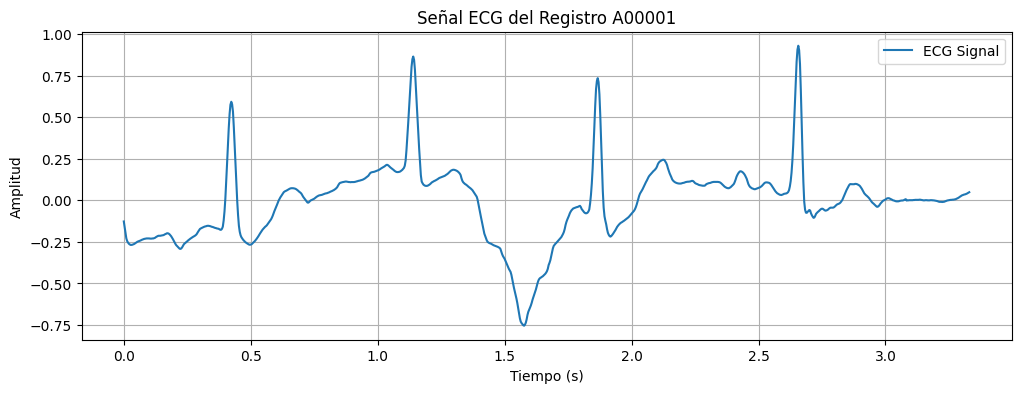

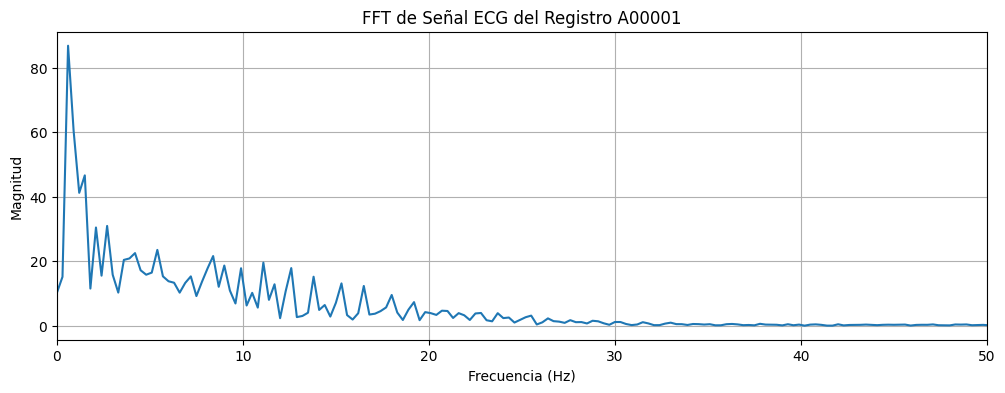

ECG signal and FFT results have been saved to 'ecg_signal.csv' and 'ecg_fft.csv'.


In [7]:
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import wfdb
import pandas as pd

# Load the ECG data
record = wfdb.rdrecord('data/training2017/A00001', sampto=1000)

# Extract the signal and time
signal = record.p_signal[:, 0]
time = np.arange(len(signal)) / record.fs

# Create a DataFrame for the signal
df = pd.DataFrame({'time': time, 'signal': signal})

# Plot the ECG signal
plt.figure(figsize=(12, 4))
plt.plot(df['time'], df['signal'], label='ECG Signal')
plt.title('Señal ECG del Registro A00001')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.show()

# Perform FFT on the ECG signal
fft_signal = np.fft.fft(signal)

# Calculate the frequency bins
frequencies = np.fft.fftfreq(len(signal), d=1/record.fs)

# Plot the FFT result
plt.figure(figsize=(12, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_signal)[:len(fft_signal)//2])
plt.title('FFT de Señal ECG del Registro A00001')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.xlim(0, 50)  # Limit x-axis to 50 Hz for better visibility
plt.grid()
plt.show()

# Save the ECG Signal DataFrame and the FFT result to CSV files
df.to_csv('ecg_signal.csv', index=False)
fft_df = pd.DataFrame({'frequency': frequencies[:len(frequencies)//2], 'magnitude': np.abs(fft_signal)[:len(fft_signal)//2]})
fft_df.to_csv('ecg_fft.csv', index=False)

# Print a message indicating that the files have been saved
print("ECG signal and FFT results have been saved to 'ecg_signal.csv' and 'ecg_fft.csv'.")



## 2. Resumen del artículo base (Clifford et al., 2017)

## 3. Análisis del dataset (cantidad de señales, duración, etiquetas, etc.)